# Problem Statement

With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy.
Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.
in this notebook a model will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.


## Intrusion detection systems

An Intrusion Detection System (IDS) is a system that monitors network traffic for suspicious activity and issues alerts when such activity is discovered. It is a software application that scans a network or a system for the harmful activity or policy breaching. Any malicious venture or violation is normally reported either to an administrator or collected centrally using a security information and event management (SIEM) system. A SIEM system integrates outputs from multiple sources and uses alarm filtering techniques to differentiate malicious activity from false alarms.

<img src=https://www.temok.com/blog/wp-content/uploads/2020/10/network2.jpg width=600/>

* Host-Based IDS (HIDS): A host-based IDS is deployed on a particular endpoint and designed to protect it against internal and external threats. Such an IDS may have the ability to monitor network traffic to and from the machine, observe running processes, and inspect the system’s logs. A host-based IDS’s visibility is limited to its host machine, decreasing the available context for decision-making, but has deep visibility into the host computer’s internals.
* Network-Based IDS (NIDS): A network-based IDS solution is designed to monitor an entire protected network. It has visibility into all traffic flowing through the network and makes determinations based upon packet metadata and contents. This wider viewpoint provides more context and the ability to detect widespread threats; however, these systems lack visibility into the internals of the endpoints that they protect.

Detection Method of IDS:

* Signature-based Method:
Signature-based IDS detects the attacks on the basis of the specific patterns such as number of bytes or number of 1’s or number of 0’s in the network traffic. It also detects on the basis of the already known malicious instruction sequence that is used by the malware. The detected patterns in the IDS are known as signatures.
Signature-based IDS can easily detect the attacks whose pattern (signature) already exists in system but it is quite difficult to detect the new malware attacks as their pattern (signature) is not known.

* Anomaly-based Method:
Anomaly-based IDS was introduced to detect unknown malware attacks as new malware are developed rapidly. In anomaly-based IDS there is use of machine learning to create a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model. Machine learning-based method has a better-generalized property in comparison to signature-based IDS as these models can be trained according to the applications and hardware configurations.

## Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

## Exploring the dataset

In [7]:
# Read Train and Test dataset
data_train = pd.read_csv("input/nslkdd/KDDTrain+.txt")

In [8]:
# Check data
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [10]:
# Assign name for columns
data_train.columns = columns

In [11]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [13]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [15]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

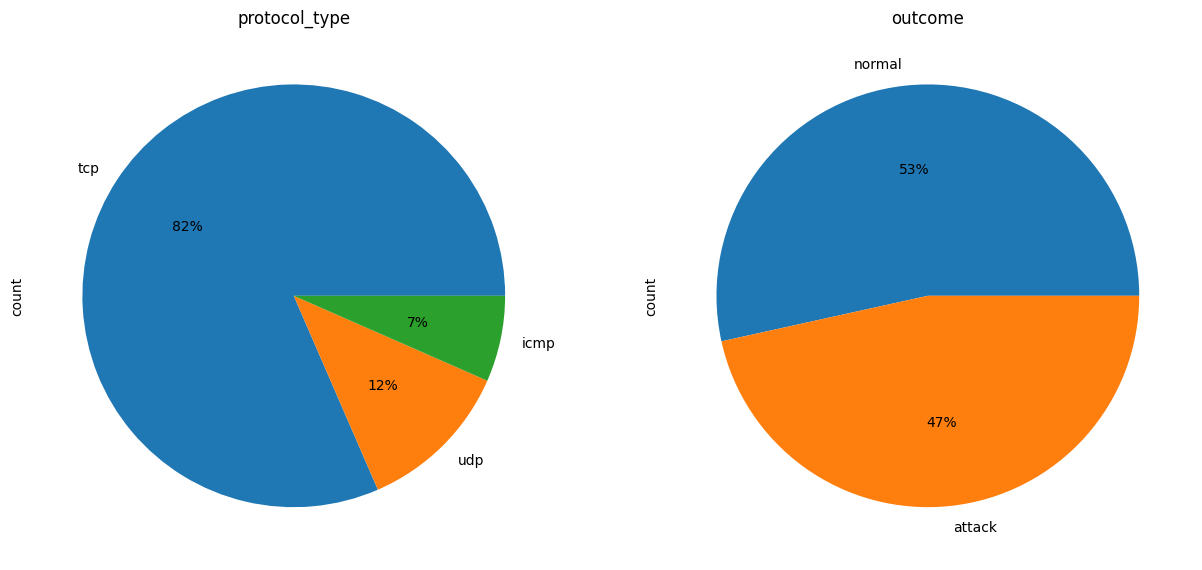

In [16]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

## Preprocessing the data

In [17]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [18]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [19]:
scaled_train = preprocess(data_train)

### Principal Component Analysis

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

#### Advantages of PCA

There are two main advantages of dimensionality reduction with PCA.

* The training time of the algorithms reduces significantly with less number of features.
* It is not always possible to analyze data in high dimensions. For instance if there are 100 features in a dataset. Total number of scatter plots required to visualize the data would be 100(100-1)2 = 4950. Practically it is not possible to analyze data this way.


In [20]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


In [21]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

## Modeling
The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

<img src="https://docs.microsoft.com/en-us/windows/ai/images/winml-model-flow.png" width="600"/>

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.
Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

## Logistic Regression
This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, and this logistic function is represented by the following formulas:

<img src = https://miro.medium.com/max/888/1*D4CIwT2zRCcVq88iji6qYQ.png />

In this logistic regression equation, h is the dependent or response variable and x is the independent variable. The beta parameter, or coefficient, in this model is commonly estimated via maximum likelihood estimation (MLE). This method tests different values of beta through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimate. Once the optimal coefficient (or coefficients if there is more than one independent variable) is found, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability. For binary classification, a probability less than .5 will predict 0 while a probability greater than 0 will predict 1.  After the model has been computed, it’s best practice to evaluate the how well the model predicts the dependent variable, which is called goodness of fit. 

#### Binary logistic regression:

In this approach, the response or dependent variable is dichotomous in nature—i.e. it has only two possible outcomes (e.g. 0 or 1). Some popular examples of its use include predicting if an e-mail is spam or not spam or if a tumor is malignant or not malignant. Within logistic regression, this is the most commonly used approach, and more generally, it is one of the most common classifiers for binary classification.

#### Multinomial logistic regression:

In this type of logistic regression model, the dependent variable has three or more possible outcomes; however, these values have no specified order.  For example, movie studios want to predict what genre of film a moviegoer is likely to see to market films more effectively. A multinomial logistic regression model can help the studio to determine the strength of influence a person's age, gender, and dating status may have on the type of film that they prefer. The studio can then orient an advertising campaign of a specific movie toward a group of people likely to go see it.

Training Accuracy Logistic Regression 88.47653730513908  Test Accuracy Logistic Regression 88.24369914665608
Training Precesion Logistic Regression 84.56373203487001  Test Precesion Logistic Regression 84.48585015981914
Training Recall Logistic Regression 91.98863757715556  Test Recall Logistic Regression 91.76898975357778


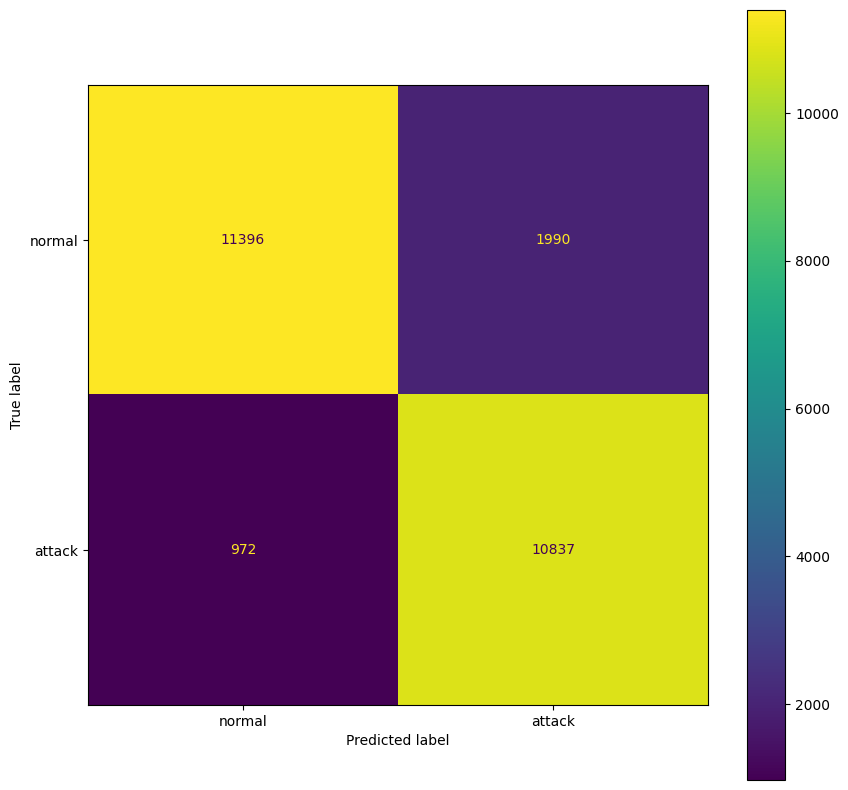

In [22]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

##  k-nearest neighbors
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

<img src = https://miro.medium.com/max/1400/1*56MmutHmr4WzDJrufP8kug.png width = 600/>

### Determine your distance metrics

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. You commonly will see decision boundaries visualized with Voronoi diagram.

<img src = https://i.stack.imgur.com/JKtab.png/>

Training Accuracy KNeighborsClassifier 99.05236313841452  Test Accuracy KNeighborsClassifier 98.93629688430245
Training Precesion KNeighborsClassifier 99.22512234910276  Test Precesion KNeighborsClassifier 99.05636317266003
Training Recall KNeighborsClassifier 98.73133850195424  Test Recall KNeighborsClassifier 98.67050554661698


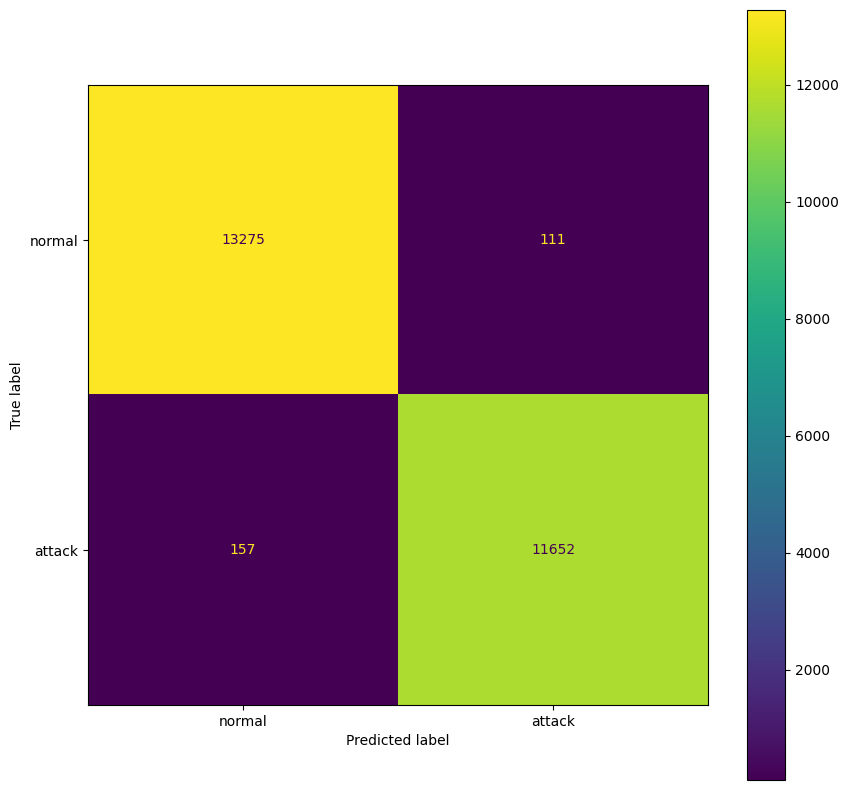

In [23]:
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## Naive Bayes
Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle. Every pair of features being classified is independent of each other.
The assumptions made by Naive Bayes are not generally correct in real-world situations. In-fact, the independence assumption is never correct but often works well in practice.

Now, it is important to know about Bayes’ theorem.

### Bayes’ Theorem

Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:

<img src = https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png width=600/>

where A and B are events and P(B) ≠ 0.

* Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
* P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
* P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.

Training Accuracy GaussianNB 91.80269307480874  Test Accuracy GaussianNB 91.60547727723754
Training Precesion GaussianNB 92.62657528189256  Test Precesion GaussianNB 92.53246753246754
Training Recall GaussianNB 89.47907990004485  Test Recall GaussianNB 89.29629943263613


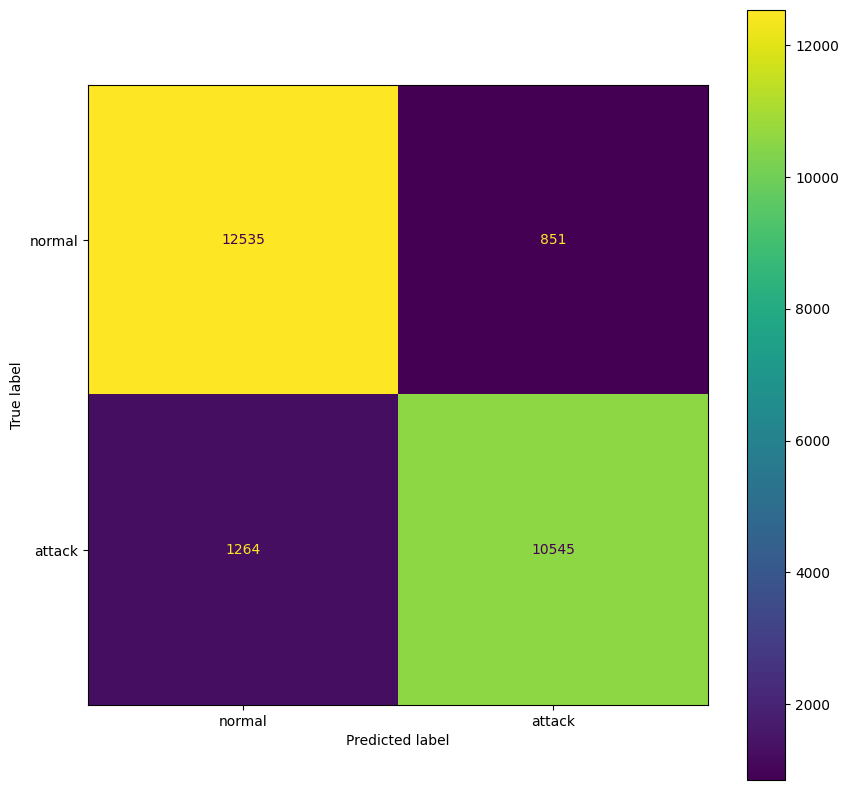

In [24]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## Support Vector Machines

Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems. Support Vector Machine for Multi-CLass Problems To perform SVM on multi-class problems, we can create a binary classifier for each class of the data. The two results of each classifier will be :

* The data point belongs to that class OR
* The data point does not belong to that class.

<img src=https://lh5.googleusercontent.com/Fqswkk7bY0_7EhTgbPWNOexWWzzDplNKYc1bJl6MI_edNVdwXnWI5xkoSyl7SxFHLLAWlW1AIEhWF2ilVvThzuU0HoPBNF79HsPezpXnKTv3DCFnD9ZeVPLmR828_JXpv5cB35TL width=600/>

For example, in a class of fruits, to perform multi-class classification, we can create a binary classifier for each fruit. For say, the ‘mango’ class, there will be a binary classifier to predict if it IS a mango OR it is NOT a mango. The classifier with the highest score is chosen as the output of the SVM. SVM for complex (Non Linearly Separable) SVM works very well without any modifications for linearly separable data. Linearly Separable Data is any data that can be plotted in a graph and can be separated into classes using a straight line.

We use Kernelized SVM for non-linearly separable data. Say, we have some non-linearly separable data in one dimension. We can transform this data into two dimensions and the data will become linearly separable in two dimensions. This is done by mapping each 1-D data point to a corresponding 2-D ordered pair. So for any non-linearly separable data in any dimension, we can just map the data to a higher dimension and then make it linearly separable. This is a very powerful and general transformation. A kernel is nothing but a measure of similarity between data points. The kernel function in a kernelized SVM tells you, that given two data points in the original feature space, what the similarity is between the points in the newly transformed feature space. There are various kernel functions available, but two are very popular :

* Radial Basis Function Kernel (RBF): The similarity between two points in the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown below. RBF is the default kernel used in SVM.

* Polynomial Kernel: The Polynomial kernel takes an additional parameter, ‘degree’ that controls the model’s complexity and computational cost of the transformation

In [25]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

Training Accuracy Linear SVC(LBasedImpl) 97.29104855274517  Test Accuracy Linear SVC(LBasedImpl) 97.08672355626116
Training Precesion Linear SVC(LBasedImpl) 97.93437846535191  Test Precesion Linear SVC(LBasedImpl) 97.59346798452944
Training Recall Linear SVC(LBasedImpl) 96.19828709339826  Test Recall Linear SVC(LBasedImpl) 96.15547463798796


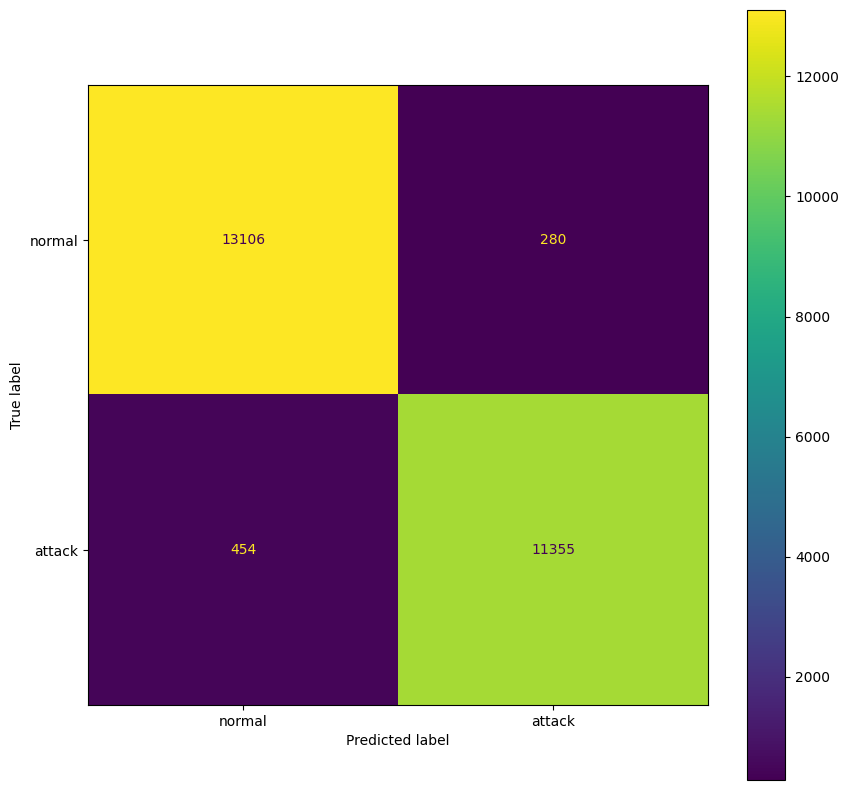

In [26]:
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## Decision Tree
Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

<img src= https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg width=500/>

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute as shown in the above figure. This process is then repeated for the subtree rooted at the new node. 
The decision tree in above figure classifies a particular morning according to whether it is suitable for playing tennis and returning the classification associated with the particular leaf.(in this case Yes or No). 

Training Accuracy DecisionTreeClassifier 99.99404626055548  Test Accuracy DecisionTreeClassifier 99.8809287557055
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.87297823693793
Training Recall DecisionTreeClassifier 99.98718523739348  Test Recall DecisionTreeClassifier 99.87297823693793


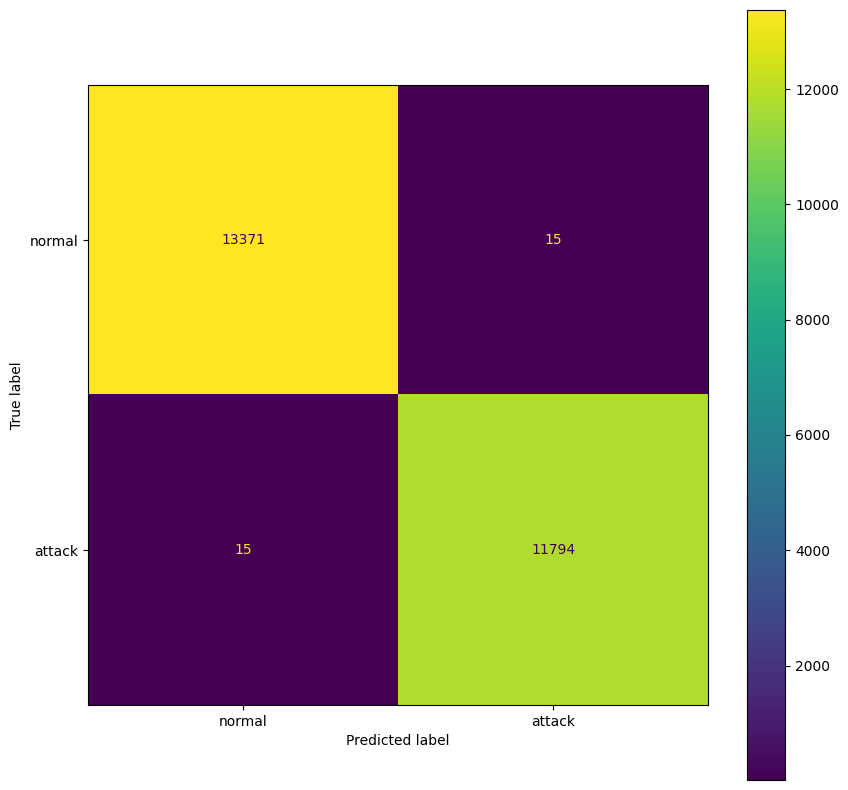

In [27]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

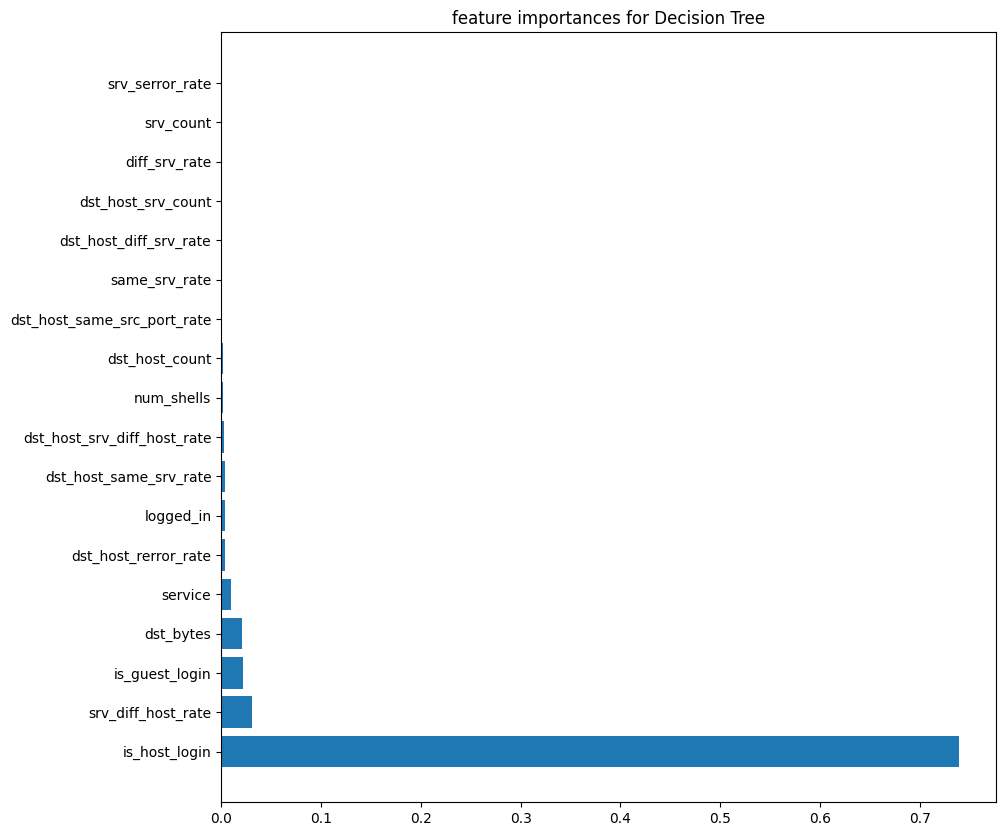

In [28]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

[Text(0.5, 0.875, 'x[5] <= -0.056\ngini = 0.497\nsamples = 100777\nvalue = [53956, 46821]'),
 Text(0.25, 0.625, 'x[65] <= 0.5\ngini = 0.149\nsamples = 46560\nvalue = [3778, 42782]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[6] <= 0.005\ngini = 0.061\nsamples = 43088\nvalue = [1358, 41730]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 42229\nvalue = [661, 41568]'),
 Text(0.1875, 0.125, 'gini = 0.306\nsamples = 859\nvalue = [697, 162]'),
 Text(0.375, 0.375, 'x[30] <= -0.211\ngini = 0.422\nsamples = 3472\nvalue = [2420, 1052]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 1033\nvalue = [11, 1022]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 2439\nvalue = [2409, 30]'),
 Text(0.75, 0.625, 'x[56] <= 0.5\ngini = 0.138\nsamples = 54217\nvalue = [50178, 4039]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9] <= 0.5\ngini = 0.066\nsamples = 51813\nvalue = [50032.0, 1781.0]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 49719\nvalue = [49043, 676]'),
 Text(0.6875,

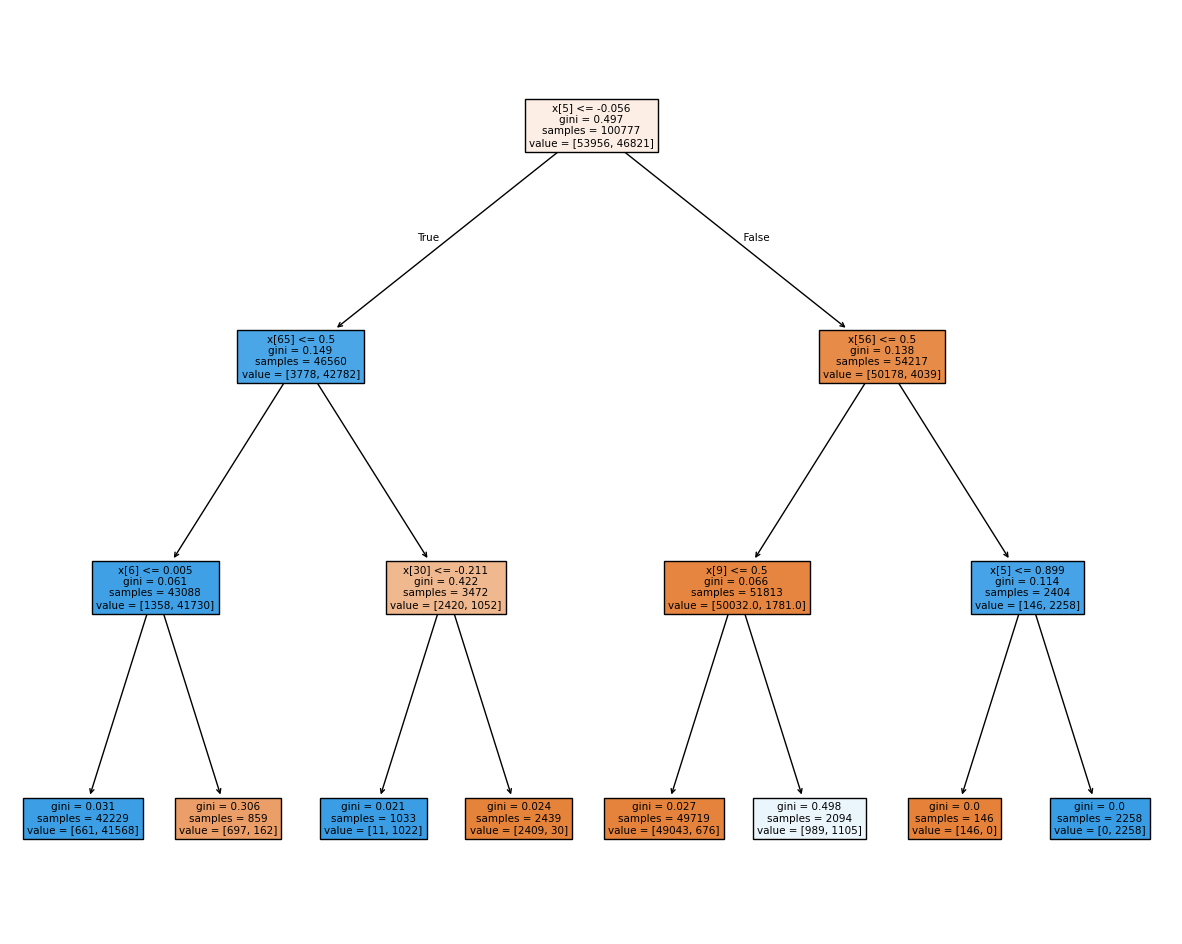

In [29]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

## Random forest

<img src=https://www.researchgate.net/publication/354354484/figure/fig4/AS:1080214163595269@1634554534720/Illustration-of-random-forest-trees.jpg width=600/>

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems. and It also resists overfitting found in decision trees.

Training Accuracy RandomForestClassifier 99.99404626055548  Test Accuracy RandomForestClassifier 99.8809287557055
Training Precesion RandomForestClassifier 99.9893219434063  Test Precesion RandomForestClassifier 99.93217465027554
Training Recall RandomForestClassifier 99.99786420623225  Test Recall RandomForestClassifier 99.81370141417563


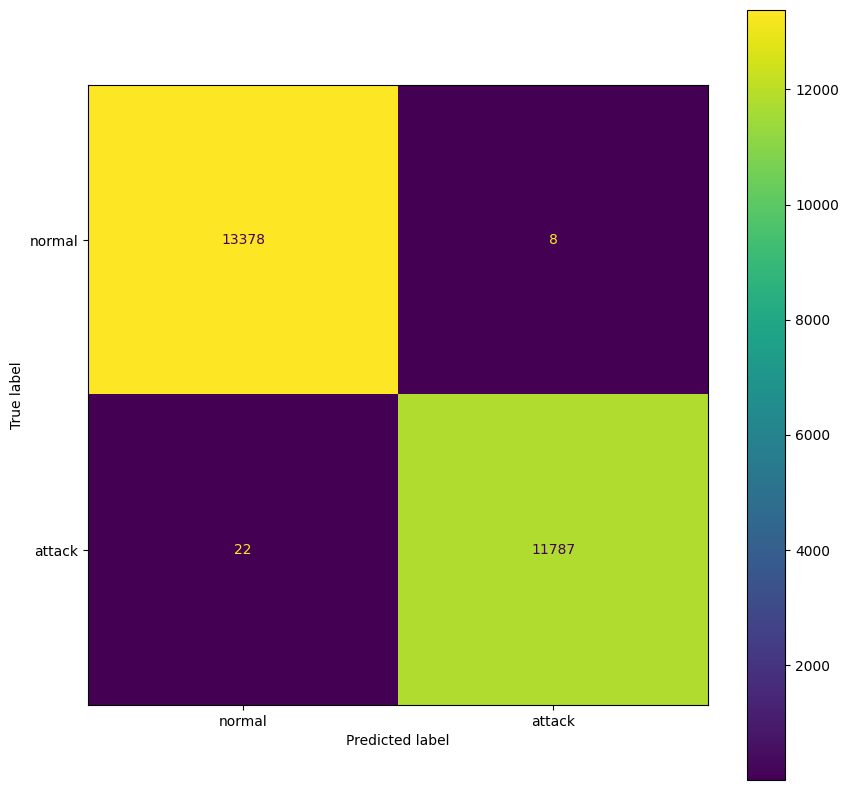

In [30]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

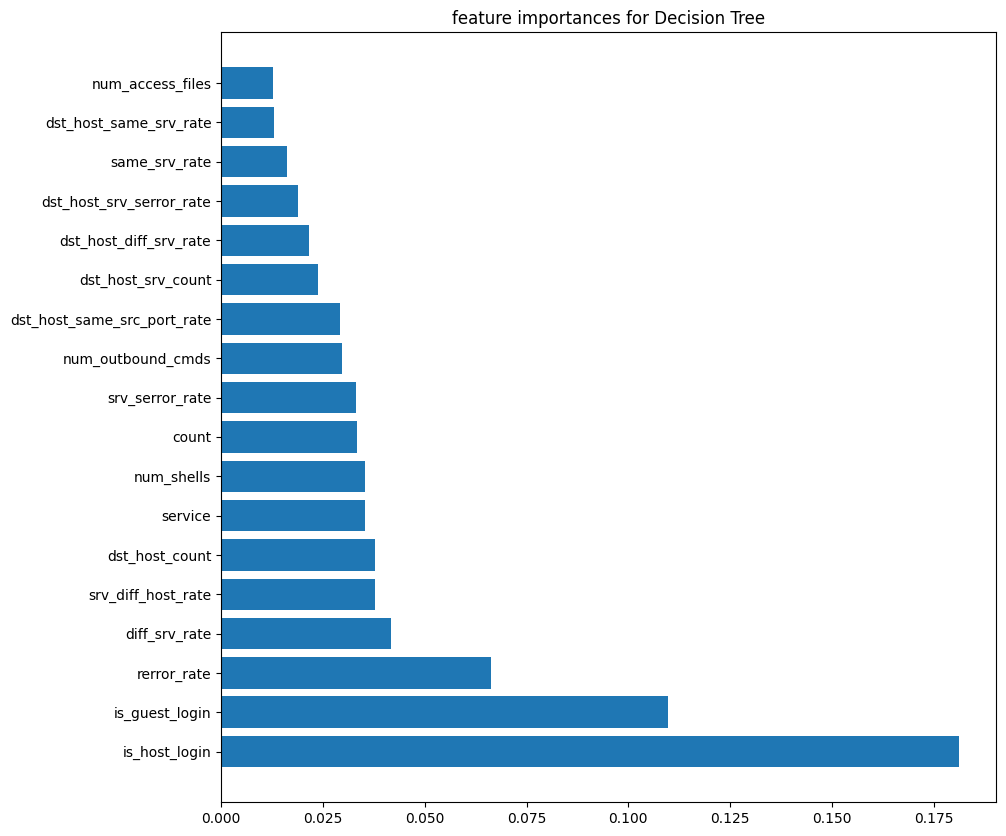

In [31]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

## Building an XGBOOST REgressor regressor in order to predict threat level

In [32]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)

In [33]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))

TypeError: got an unexpected keyword argument 'squared'

In [ ]:
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])

## Measuring effect of PCA

In [ ]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

## Neural networks

Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, connects to another and has an associated weight and threshold. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no data is passed along to the next layer of the network.

<img src= https://www.researchgate.net/publication/335903047/figure/fig1/AS:805611931443200@1569084260672/Proposed-artificial-neural-network-model-3-10-1-Neural-network-weight-vectors-are.png width=600/>

Neural networks rely on training data to learn and improve their accuracy over time. However, once these learning algorithms are fine-tuned for accuracy, they are powerful tools in computer science and artificial intelligence, allowing us to classify and cluster data at a high velocity. Tasks in speech recognition or image recognition can take minutes versus hours when compared to the manual identification by human experts. One of the most well-known neural networks is Google’s search algorithm.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]), 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu', 
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

In [ ]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()